In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

### Definitions

Setting $n$ and $p$ for $ER_n(p)$, $ER$ being Erdos-Renyi

In [18]:
def generate_An(n: int, p: float):
    An = np.random.binomial(1, p, size=(n, n))
    np.fill_diagonal(An, val=0)
    An[np.tril_indices(n, k=-1)] = An.T[np.tril_indices(n, k=-1)]

    return An


def generate_Dn(An):
    n = An.shape[0]
    Dn = np.zeros(shape=(n, n))
    degrees = np.matrix(An).sum(axis=1)
    np.fill_diagonal(Dn, degrees)
    Dn = Dn.astype(int)

    return Dn


def generate_Deltan(An, Dn):
    laplacian = Dn - An

    return laplacian


def generate_Ln(An, Dn):
    n = An.shape[0]
    degrees = np.matrix(An).sum(axis=1)
    degrees_inv_sqrt = 1/np.sqrt(degrees)
    Dn_inv_sqrt = np.zeros(shape=(n, n))
    np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)

    Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)

    return Ln


def normalized_An_spectra(An, p):
    n = An.shape[0]
    centered_An = An - p
    normed_centered_An = centered_An * 1/np.sqrt(n * p * (1 - p))
    eigen_normed_An = np.linalg.eigvalsh(normed_centered_An)

    return eigen_normed_An


def normalized_Deltan_spectra(Deltan, p, x_range = np.linspace(-5, 5, 100)):
    n = Deltan.shape[0]
    normed_centered_eigen_Laplacian_n = (np.linalg.eigvalsh(Deltan) - n * p) /(np.sqrt(n * p * (1 -p)))
    Fn_Laplacian = [np.sum(normed_centered_eigen_Laplacian_n <= x)/n for x in x_range]

    return np.diff(Fn_Laplacian)


def normalized_Ln_spectra(Ln, p, x_range = np.linspace(-5, 5, 100)):
    n = Ln.shape[0]
    eigen_Ln = np.linalg.eigvalsh(Ln)
    normed_centered_eigen_Ln = (1 - eigen_Ln) * np.sqrt((n * p))
    Fn_Normed_Laplacian = [np.sum(normed_centered_eigen_Ln <= x)/n for x in x_range]

    return np.diff(Fn_Normed_Laplacian)

In [25]:
n = 10000
lambda_range = np.arange(1, 101)
x_range = np.linspace(-5, 5, 100)
p_range = lambda_range/n

In [27]:
simulation_results = {}

for p in p_range:
    try:
        An = generate_An(n, p)
        Dn = generate_Dn(An)
        laplacian = generate_Deltan(An, Dn)
        Ln = generate_Ln(An, Dn)
        eigen_normed_An = normalized_An_spectra(An, p)
        eigen_Ln = np.linalg.eigvalsh(Ln)
        eigen_Laplacian_n = np.linalg.eigvalsh(laplacian)
        Fn_Laplacian = normalized_Deltan_spectra(laplacian, p)
        Fn_Normed_Laplacian = normalized_Ln_spectra(Ln, p)
    except np.linalg.LinAlgError:
        continue

    simulation_results[p] = {
        "An": An,
        "Dn": Dn,
        "Deltan": laplacian,
        "Ln": Ln,
        "Fn_Laplacian": Fn_Laplacian,
        "Fn_Normed_Laplacian": Fn_Normed_Laplacian
    }

/var/folders/ww/k1c8g8897872xcq5ddjx8d600000gn/T/ipykernel_78515/4010421365.py:27: RuntimeWarning: divide by zero encountered in divide
  degrees_inv_sqrt = 1/np.sqrt(degrees)
/var/folders/ww/k1c8g8897872xcq5ddjx8d600000gn/T/ipykernel_78515/4010421365.py:31: RuntimeWarning: invalid value encountered in matmul
  Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)


Text(0.5, 1.0, 'Spectral Distribution of Centered, Normalized $A_N, N=10000$')

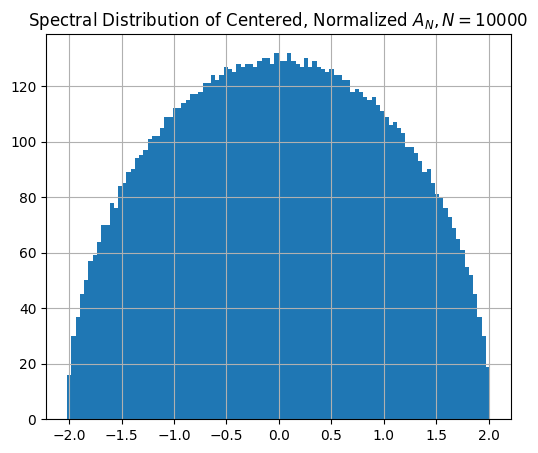

In [22]:
eigen_normed_An = normalized_An_spectra(An, p)

# fig, ax = plt.subplots(figsize=(6, 5))

# ax.hist(eigen_normed_An,
#         bins=100)
# ax.grid()

# ax.set_title("Spectral Distribution of Centered, Normalized $A_N, N=%s$" % n)

Text(0.5, 0.98, 'Unnormalized/Uncentered Spectral Distributions of Sparse $\\Delta_N$ and $L_N, N=10000$, $np$ to $\\lambda$')

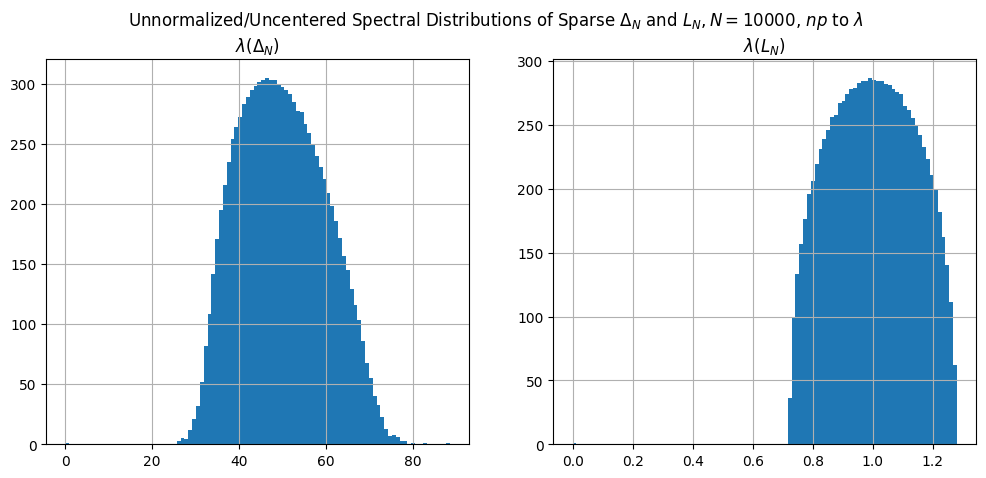

In [23]:
eigen_Ln = np.linalg.eigvalsh(Ln)
eigen_Laplacian_n = np.linalg.eigvalsh(laplacian)

# fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

# axs[0].hist(eigen_Laplacian_n,
#             bins=100)
# axs[0].grid()
# axs[0].set_title("$\lambda(\Delta_N$)")

# axs[1].hist(eigen_Ln,
#             bins=100)
# axs[1].grid()
# axs[1].set_title("$\lambda(L_N)$")

# fig.suptitle("Unnormalized/Uncentered Spectral Distributions of Sparse $\Delta_N$ and $L_N, N=%s, p=%s$" % n)

Text(0.5, 0.98, 'Normalized/Centered Spectral Distributions of Sparse $\\Delta_N$ and $L_N, N=10000, p=0.005$,')

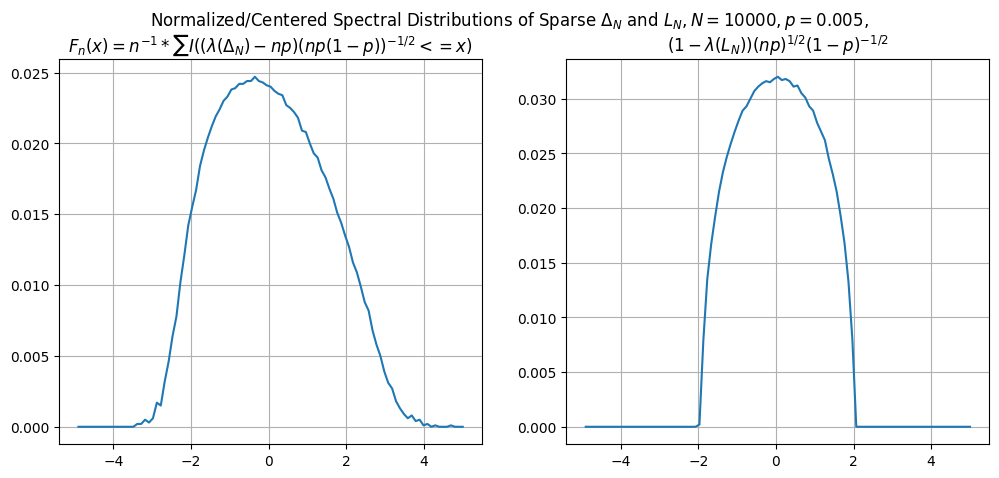

In [24]:
Fn_Laplacian = normalized_Deltan_spectra(laplacian, p)
Fn_Normed_Laplacian = normalized_Ln_spectra(Ln, p)

# fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

# axs[0].plot(x_range[1:], Fn_Laplacian)
# axs[0].grid()
# axs[0].set_title("$F_n(x) = n^{-1} * \sum I((\lambda(\Delta_N) - np)(np(1-p))^{-1/2} <= x)$")

# axs[1].plot(x_range[1:],
#             Fn_Normed_Laplacian)
# axs[1].grid()
# axs[1].set_title("$(1-\lambda(L_N))(np)^{1/2}(1-p)^{-1/2}$")

# fig.suptitle("Normalized/Centered Spectral Distributions of Sparse $\Delta_N$ and $L_N, N=%s, p=%s$," % (n, p))